In [24]:
%load_ext autoreload
%autoreload 2

from nnTrain import train_efn, train_pfn, get_data, get_data_softDrop
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Process
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow import keras
from keras import backend as K
from energyflow.utils import data_split, to_categorical
from sklearn.model_selection import train_test_split
import gc
from tensorflow.keras.losses import BinaryCrossentropy

# define rng seeds for train/test/val split for replicable results
rng1 = 45446
rng2 = 25135

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Quark jets, R = 0.8

In [3]:
base="/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/"
nmax = 200000

hdata = get_data('q',hlevel=True,efrac=True,base=base,nmax=nmax,wta=True)
htrain, htest = train_test_split(hdata,train_size=0.5,random_state=rng1)
htest, hval = train_test_split(htest,train_size=0.5,random_state=rng2)

pdata = get_data('q',hlevel=False,efrac=True,base=base,nmax=nmax,wta=True)
ptrain, ptest = train_test_split(pdata,train_size=0.5,random_state=rng1)
ptest, pval = train_test_split(ptest,train_size=0.5,random_state=rng2)

train = np.concatenate((htrain,ptrain),axis=0)
train_labels = np.concatenate((np.ones((htrain.shape[0],1)),np.zeros((ptrain.shape[0],1))),axis=0)
perm = np.random.permutation(train.shape[0])
train = train[perm]
train_labels = train_labels[perm]

test = np.concatenate((htest,ptest),axis=0)
test_labels = np.concatenate((np.ones((htest.shape[0],1)),np.zeros((ptest.shape[0],1))),axis=0)
perm = np.random.permutation(test.shape[0])
test = test[perm]
test_labels = test_labels[perm]

val = np.concatenate((hval,pval),axis=0)
val_labels = np.concatenate((np.ones((hval.shape[0],1)),np.zeros((pval.shape[0],1))),axis=0)
perm = np.random.permutation(val.shape[0])
val = val[perm]
val_labels = val_labels[perm]

del hdata, pdata, htrain, htest, hval, ptrain, ptest, pval, perm

Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set4_R1.0_mH1000_pTall_WTA.h5
Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2qq_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_

## EFNs

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     180         ['phats_input[0][0]']            
                                                                                                  
 activation (Activation)        (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     3660        ['activation[0][0]']             
                                                                                              

2023-09-12 16:05:06.932740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-12 16:05:07.213947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-12 16:05:07.214317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-12 16:05:07.215062: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Epoch 1/100
 17/391 [>.............................] - ETA: 2s - loss: 0.6924 - acc: 0.5389  

2023-09-12 16:05:11.505366: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


391/391 [==============================] - 6s 11ms/step - loss: 0.5360 - acc: 0.7211 - val_loss: 0.4425 - val_acc: 0.7883
Epoch 2/100
391/391 [==============================] - 4s 9ms/step - loss: 0.4413 - acc: 0.7937 - val_loss: 0.4091 - val_acc: 0.8135
Epoch 3/100
391/391 [==============================] - 4s 9ms/step - loss: 0.4214 - acc: 0.8059 - val_loss: 0.3953 - val_acc: 0.8224
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 0.4082 - acc: 0.8157 - val_loss: 0.3900 - val_acc: 0.8253
Epoch 5/100
391/391 [==============================] - 4s 9ms/step - loss: 0.3964 - acc: 0.8229 - val_loss: 0.3937 - val_acc: 0.8258
Epoch 6/100
391/391 [==============================] - 4s 9ms/step - loss: 0.3890 - acc: 0.8272 - val_loss: 0.3845 - val_acc: 0.8301
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 0.3817 - acc: 0.8318 - val_loss: 0.3693 - val_acc: 0.8391
Epoch 8/100
391/391 [==============================] - 4s 9ms/step - loss: 0.372

3075

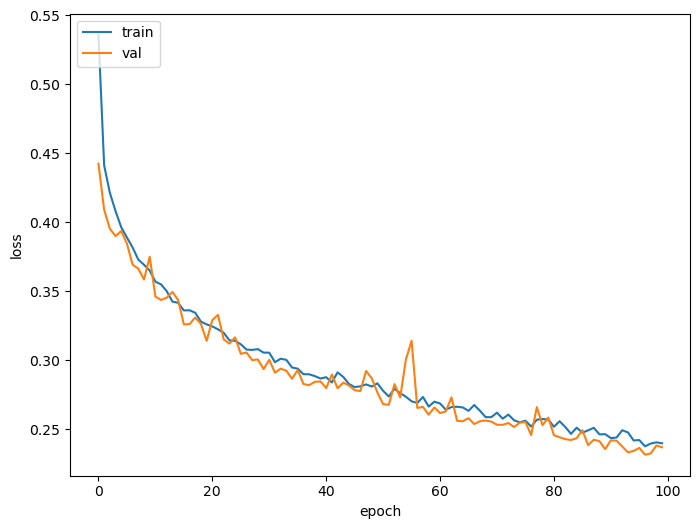

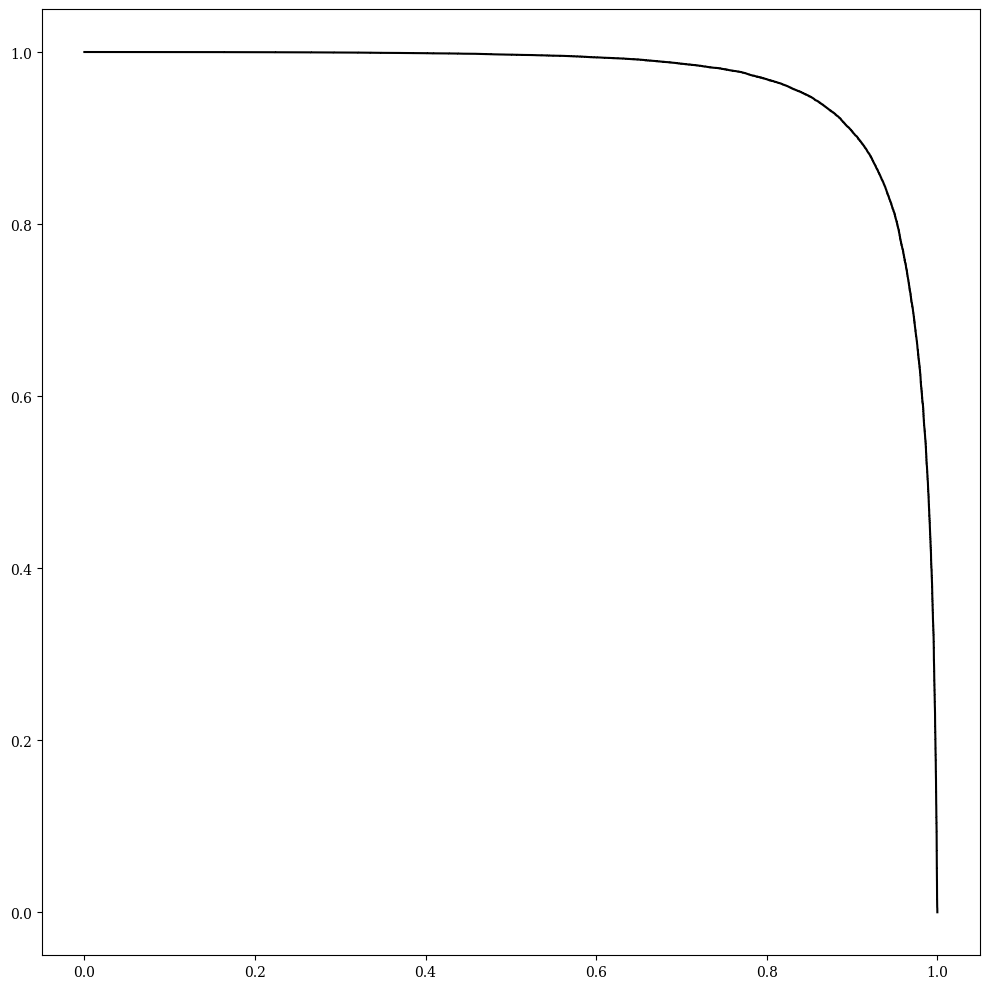

In [4]:
# Regular EFN, no spectral normalization
loss = BinaryCrossentropy(from_logits=False)
#out_act = keras.activations.linear
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "F_dropouts":0.1,
                "input_dim":2,
                "output_dim":1,"output_act":"sigmoid",
                "patience":5,
                "optimizer":Adam(1e-3),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = False
train_kwargs = {"epochs":100,"verbose":1,"batch_size":512}
efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save("keras_models_wta/qjet_EFN_zpT_iter1.keras")
del efn
gc.collect()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     361         ['phats_input[0][0]']            
                                                                                                  
 activation (Activation)        (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     7321        ['activation[0][0]']             
                                                                                              

2023-09-12 19:50:19.217229: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Epoch 1/150
20/20 [==============================] - 7s 171ms/step - loss: 0.6931 - acc: 0.5325 - val_loss: 0.6930 - val_acc: 0.5368
Epoch 2/150
20/20 [==============================] - 3s 135ms/step - loss: 0.6930 - acc: 0.5356 - val_loss: 0.6930 - val_acc: 0.5316
Epoch 3/150
20/20 [==============================] - 3s 138ms/step - loss: 0.6930 - acc: 0.5258 - val_loss: 0.6930 - val_acc: 0.5223
Epoch 4/150
20/20 [==============================] - 3s 135ms/step - loss: 0.6928 - acc: 0.5150 - val_loss: 0.6928 - val_acc: 0.5176
Epoch 12/150
20/20 [==============================] - 3s 136ms/step - loss: 0.6928 - acc: 0.5156 - val_loss: 0.6928 - val_acc: 0.5162
Epoch 13/150
20/20 [==============================] - 3s 135ms/step - loss: 0.6928 - acc: 0.5192 - val_loss: 0.6928 - val_acc: 0.5177
Epoch 14/150
20/20 [==============================] - 3s 138ms/step - loss: 0.6928 - acc: 0.5160 - val_loss: 0.6928 - val_acc: 0.5148
Epoch 15/150
20/20 [==============================] - 3s 136ms/ste

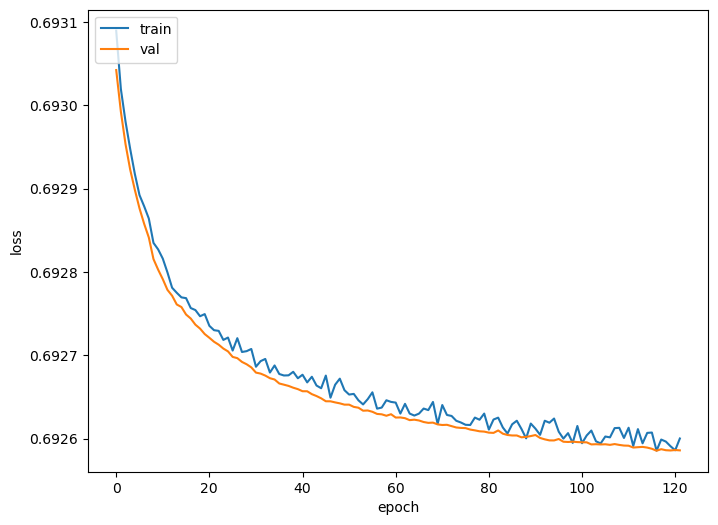

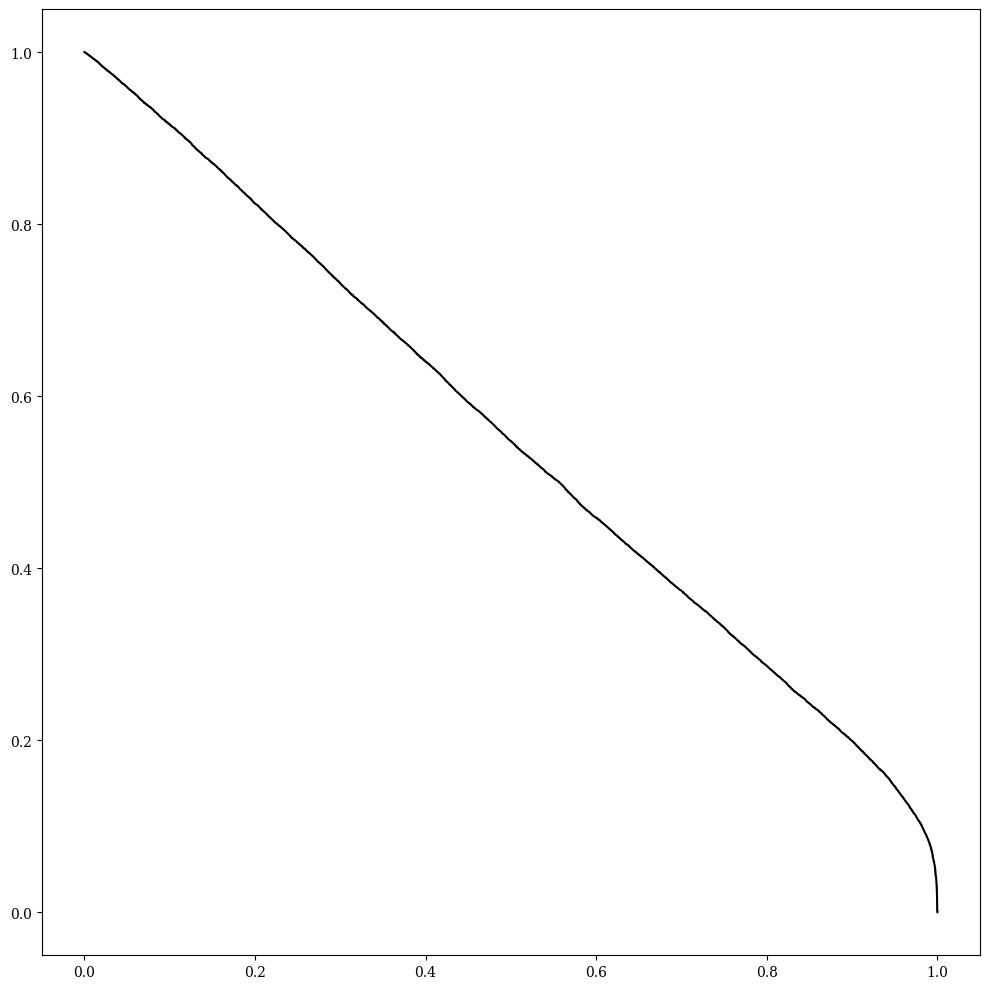

In [26]:
# EFN with spectral normalization
for i in range(1,2):
    loss = BinaryCrossentropy(from_logits=False)
    #out_act = keras.activations.linear
    model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                    "F_dropouts":0.1,
                    "input_dim":2,
                    "output_dim":1,"output_act":"sigmoid",
                    "patience":5,
                    "optimizer":Adam(1e-4),
                    "loss":loss,
                    "summary":True}
    model_kwargs['spectral'] = True
    train_kwargs = {"epochs":150,"verbose":1,"batch_size":10000}
    efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                                  (test,test_labels),
                                                  (val,val_labels),
                                                  model_kwargs,
                                                  train_kwargs,
                                                  plot=True)
    efn.save(f"keras_models_wta/qjet_spectralEFN_zpT_iter{i}.keras")
    del efn
    gc.collect()

## L = 2 study

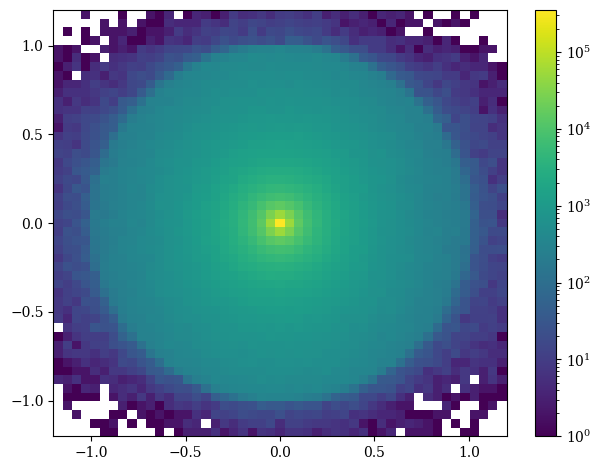

In [7]:
mask = test[test_labels[:,0]==1][:,:,0].flatten()>0
from matplotlib.colors import LogNorm
h = plt.hist2d(test[test_labels[:,0]==1][:,:,1].flatten()[mask],test[test_labels[:,0]==1][:,:,2].flatten()[mask],
               bins=np.linspace(-1.2,1.2,50),norm=LogNorm())
plt.colorbar()

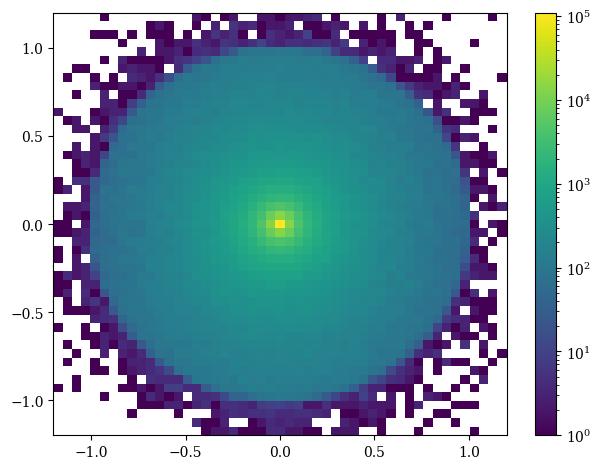

In [8]:
mask = test[test_labels[:,0]==0][:,:,0].flatten()>0
from matplotlib.colors import LogNorm
h = plt.hist2d(test[test_labels[:,0]==0][:,:,1].flatten()[mask],test[test_labels[:,0]==0][:,:,2].flatten()[mask],
               bins=np.linspace(-1.2,1.2,50),norm=LogNorm())
plt.colorbar()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 100)    300         ['phats_input[0][0]']            
                                                                                                  
 activation_21 (Activation)     (None, None, 100)    0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 100)    10100       ['activation_21[0][0]']          
                                                                                            

2624

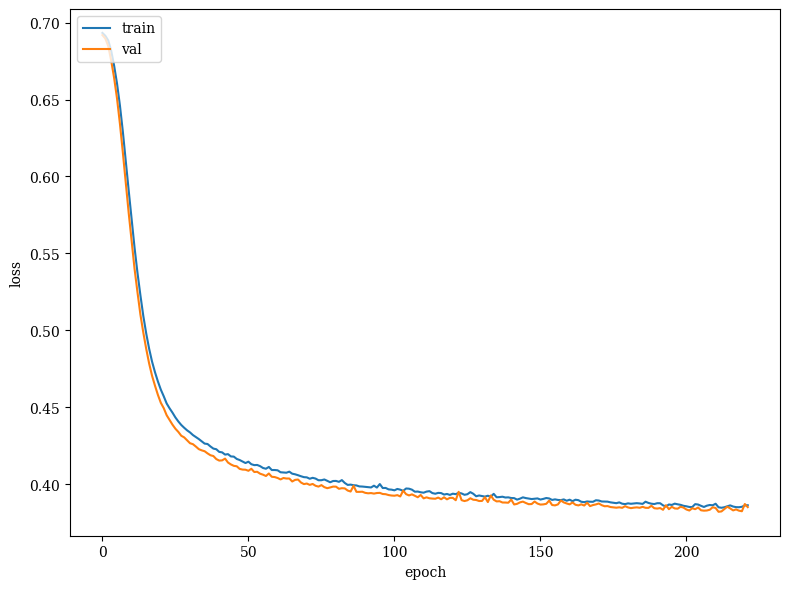

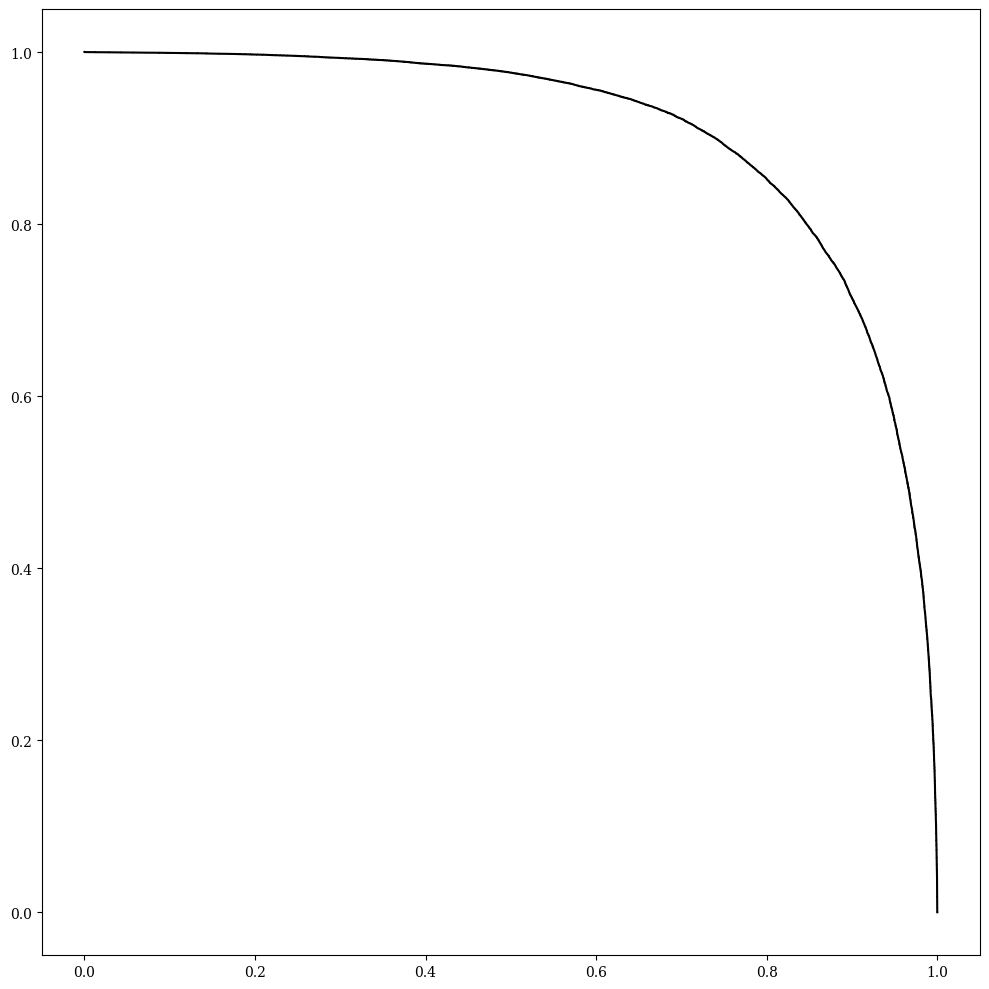

In [12]:
# Regular EFN, no spectral normalization
loss = BinaryCrossentropy(from_logits=False)
L = 2
model_kwargs = {"Phi_sizes":(100,100,L), "F_sizes":(100,100,100),
                "F_dropouts":0.1,
                "input_dim":2,
                "output_dim":1,"output_act":"sigmoid",
                "patience":10,
                "optimizer":Adam(1e-4),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = False
train_kwargs = {"epochs":500,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save(f"keras_models_wta_Lsmall/qjet_EFN_zpT_L{L}_iter1.keras")
#del efn
gc.collect()

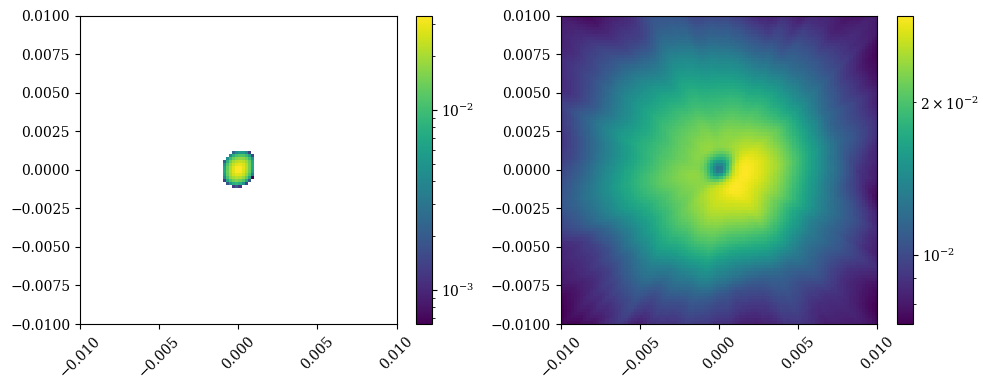

In [32]:
from matplotlib.colors import LogNorm, Normalize
R = 0.01
X,Y,Z = efn.eval_filters(R,prune=False)
colors = ["Reds","Blues","Greens","Oranges","Purples","Greys","YlOrBr","RdPu"]
fig,axes = plt.subplots(1,len(Z),figsize=(5*len(Z),4))
for i in range(len(Z)):
    plt.sca(axes.flatten()[i])
    norm = Normalize() if np.all(Z[i] == 0) else LogNorm()
    plt.imshow(Z[i].T,origin='lower',extent=[-R,R,-R,R],aspect='auto',norm=norm)
    plt.colorbar()
    plt.xticks(rotation=45)

In [55]:
import tensorflow.keras.backend as K

In [56]:
s = efn.Phi_sizes[-1]
in_t, out_t = efn.inputs[1], efn._tensors[efn._tensor_inds['latent'][0]-1]
# construct function
kf = K.function(in_t,out_t)
kf2 = K.function(efn._tensors[efn._tensor_inds['latent'][1]-1],efn._tensors[-1])

In [61]:
nx=100
ny=100
xmax = 0.1
xmin = 0
ymax= 0.1
ymin = 0
xs, ys = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(xs, ys, indexing='ij')
XY = np.asarray([X, Y]).reshape((2, nx*ny)).transpose(1,0)
s = 1

# evaluate function
Z = kf2(XY).reshape(nx, ny)

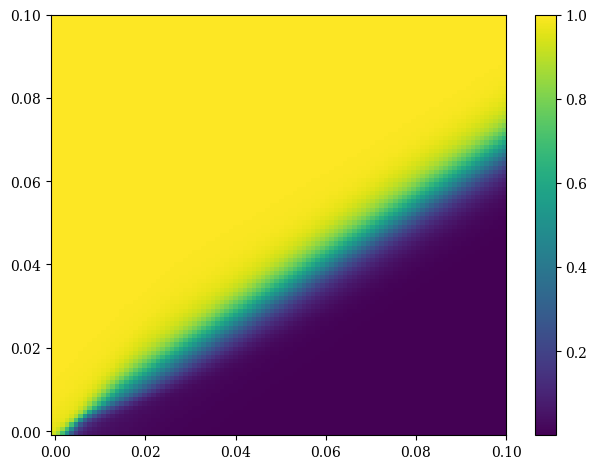

In [62]:
plt.imshow(Z.T,origin='lower',extent=[-0.001,xmax,-0.001,ymax],aspect='auto')
plt.colorbar()

In [63]:
def process(chunk):
    return np.sum(chunk[:,:,:1]*kf(chunk[:,:,1:]),axis=1)
def label(chunk):
    return kf2(chunk)
split = np.array_split(np.arange(len(test)),len(test)//1000)
latent = []
out = []
out2 = []
for sp in split:
    l = process(test[sp])
    o = label(l)
    latent.append(l)
    out.append(o)
    out2.append(efn.predict([test[sp][:,:,0],test[sp][:,:,1:]]))
latent = np.concatenate(latent,axis=0)
out = np.concatenate(out,axis=0)
out2 = np.concatenate(out2,axis=0)

32/32 [==============================] - 0s 1ms/step


## L = 1 study

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 100)    300         ['phats_input[0][0]']            
                                                                                                  
 activation (Activation)        (None, None, 100)    0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 100)    10100       ['activation[0][0]']             
                                                                                              

2023-09-13 18:43:22.964338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-13 18:43:24.342752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-13 18:43:24.343177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-13 18:43:24.343977: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Epoch 1/500
 1/20 [>.............................] - ETA: 53s - loss: 0.7018 - acc: 0.4977

2023-09-13 18:43:29.843981: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


20/20 [==============================] - 6s 156ms/step - loss: 0.6950 - acc: 0.5293 - val_loss: 0.6928 - val_acc: 0.5114
Epoch 2/500
20/20 [==============================] - 2s 125ms/step - loss: 0.6930 - acc: 0.5178 - val_loss: 0.6922 - val_acc: 0.5132
Epoch 3/500
20/20 [==============================] - 3s 128ms/step - loss: 0.6920 - acc: 0.5316 - val_loss: 0.6908 - val_acc: 0.5582
Epoch 4/500
20/20 [==============================] - 2s 124ms/step - loss: 0.6901 - acc: 0.5633 - val_loss: 0.6880 - val_acc: 0.5994
Epoch 5/500
20/20 [==============================] - 2s 124ms/step - loss: 0.6859 - acc: 0.6207 - val_loss: 0.6819 - val_acc: 0.6830
Epoch 6/500
20/20 [==============================] - 2s 123ms/step - loss: 0.6790 - acc: 0.6976 - val_loss: 0.6736 - val_acc: 0.7127
Epoch 7/500
20/20 [==============================] - 2s 124ms/step - loss: 0.6708 - acc: 0.7108 - val_loss: 0.6643 - val_acc: 0.7128
Epoch 8/500
20/20 [==============================] - 2s 125ms/step - loss: 0.6608

684

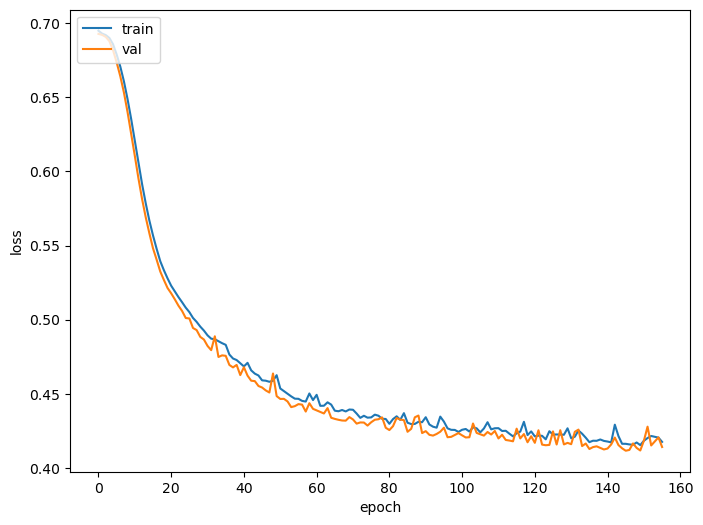

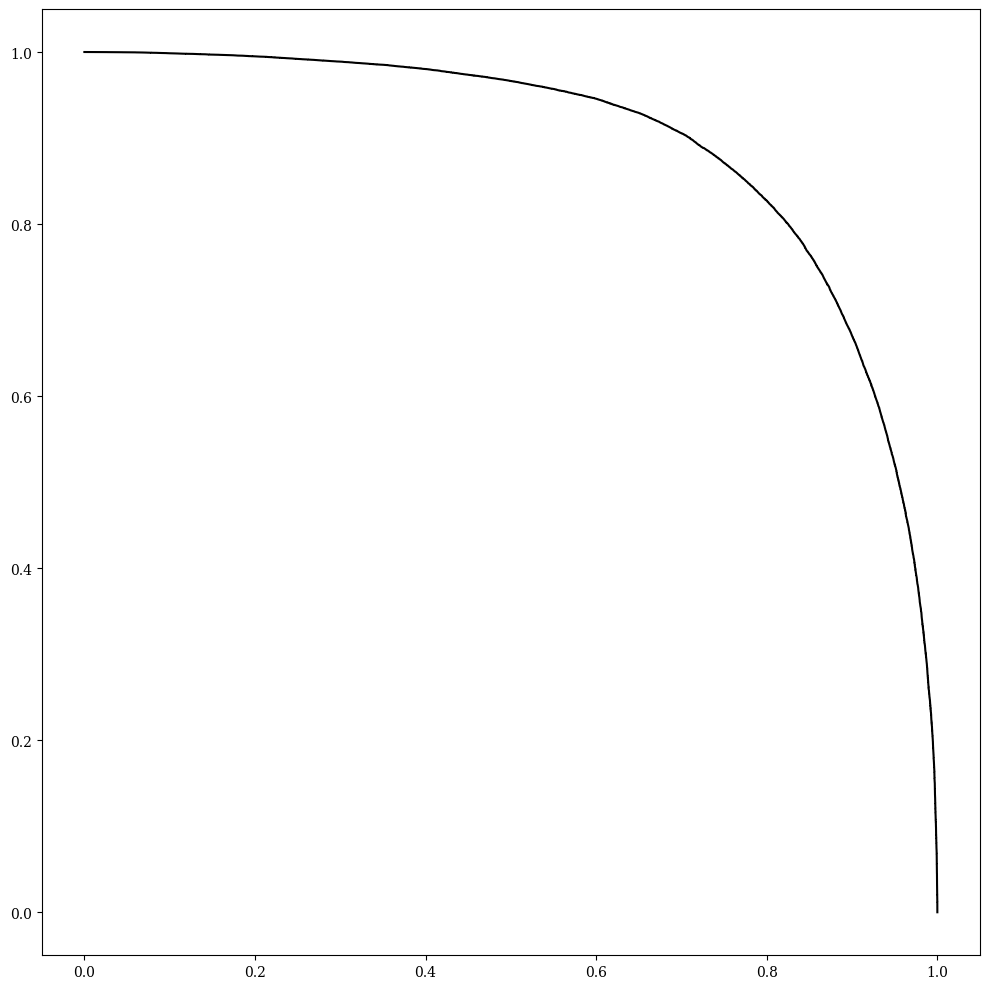

In [4]:
# Regular EFN, no spectral normalization
loss = BinaryCrossentropy(from_logits=False)
L = 1
model_kwargs = {"Phi_sizes":(100,100,L), "F_sizes":(100,100,100),
                "F_dropouts":0.1,
                "input_dim":2,
                "output_dim":1,"output_act":"sigmoid",
                "patience":10,
                "optimizer":Adam(1e-4),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = False
train_kwargs = {"epochs":500,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save(f"keras_models_wta_Lsmall/qjet_EFN_zpT_L{L}_iter1.keras")
#del efn
gc.collect()

In [25]:
import tensorflow.keras.backend as K
model = keras.models.load_model("keras_models_wta_Lsmall/qjet_EFN_zpT_L1_iter1.keras")

In [32]:
model.layers

In [35]:
kf = K.function(model.layers[0].input,model.layers[8].output)
def eval_filter(kf,R,n=100):
    xmin, ymin, xmax, ymax = -R, -R, R, R
    nx = ny = n
    # construct grid of inputs
    xs, ys = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
    X, Y = np.meshgrid(xs, ys, indexing='ij')
    XY = np.asarray([X, Y]).reshape((1, 2, nx*ny)).transpose((0, 2, 1))
    # evaluate function
    Z = kf(XY)[0].reshape(nx, ny, s).transpose((2, 0, 1))
    return X, Y, Z

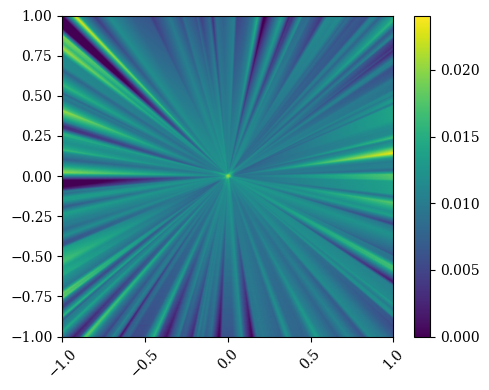

In [38]:
from matplotlib.colors import LogNorm, Normalize
from scipy.optimize import curve_fit
R = 1.0
#X,Y,Z = efn.eval_filters(R,prune=False,n=1000)
X,Y,Z = eval_filter(kf,R,n=1000)
colors = ["Reds","Blues","Greens","Oranges","Purples","Greys","YlOrBr","RdPu"]
fig,axes = plt.subplots(1,1,figsize=(5*len(Z),4))
for i in range(len(Z)):
    plt.sca(axes)
    norm = Normalize()
    plt.imshow(Z[i].T,origin='lower',extent=[-R,R,-R,R],aspect='auto',norm=norm)
    plt.colorbar()
    plt.xticks(rotation=45)

/tmp/ipykernel_421574/3622803286.py:2: RuntimeWarning: invalid value encountered in log
  return a - b*np.log(x+c)


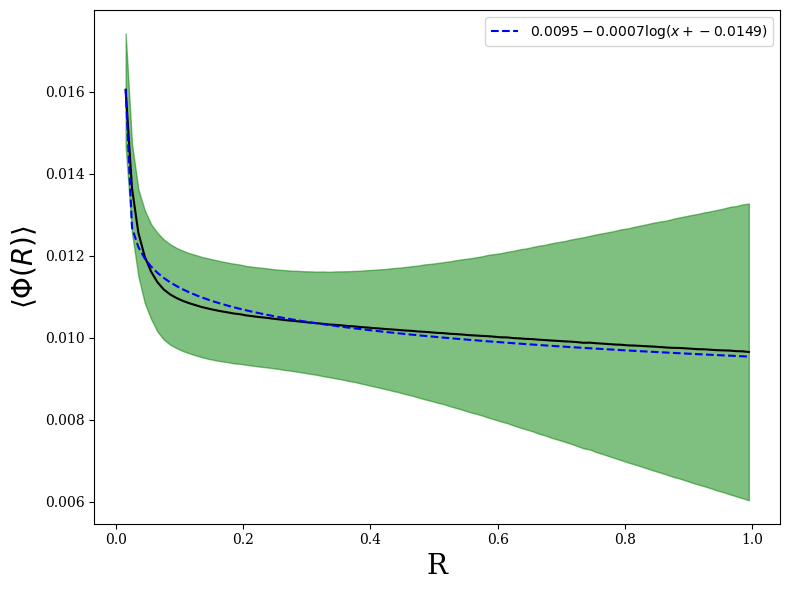

In [51]:
def log_func(x,a,b,c):
    return a - b*np.log(x+c)
R = np.sqrt(X**2 + Y**2)
rbins = np.linspace(0.01,1,100)
bin_centers = (rbins[:-1]+rbins[1:])/2
r_inds = np.digitize(R.flatten(),rbins)-1
z_means = np.array([np.mean(Z.flatten()[r_inds == i]) for i in range(len(bin_centers))])
z_stds = np.array([np.std(Z.flatten()[r_inds == i]) for i in range(len(bin_centers))])

remove = np.isnan(z_means) | np.isnan(z_stds)

popt, pcov = curve_fit(log_func, bin_centers[~remove], z_means[~remove], sigma=z_stds[~remove])
#popt, pcov = curve_fit(log_func, R.flatten(),Z.flatten())
plt.figure(figsize=(8,6))
plt.plot(bin_centers,z_means,zorder=2,color='black')
plt.fill_between(bin_centers,z_means+z_stds,z_means-z_stds,color='green',alpha=0.5,zorder=1)
plt.xlabel("R",fontsize=20)
plt.ylabel(r"$\langle \Phi(R) \rangle$",fontsize=20)
plt.plot(bin_centers,log_func(bin_centers,*popt),color='blue',linestyle='--',
         label=r"${0:.4f} - {1:.4f}\log(x+{2:.4f})$".format(popt[0],popt[1],popt[2]))
plt.legend()
#plt.plot(bin_centers,popt[0]*np.log(1/(0.01*bin_centers)))

# Gluon jets, R = 0.8

In [3]:
base="/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/"
nmax = 200000

hdata = get_data('g',hlevel=True,efrac=False,base=base,nmax=nmax,wta=True)
htrain, htest = train_test_split(hdata,train_size=0.5,random_state=rng1)
htest, hval = train_test_split(htest,train_size=0.5,random_state=rng2)

pdata = get_data('g',hlevel=False,efrac=False,base=base,nmax=nmax,wta=True)
ptrain, ptest = train_test_split(pdata,train_size=0.5,random_state=rng1)
ptest, pval = train_test_split(ptest,train_size=0.5,random_state=rng2)

train = np.concatenate((htrain,ptrain),axis=0)
train_labels = np.concatenate((np.ones((htrain.shape[0],1)),np.zeros((ptrain.shape[0],1))),axis=0)
perm = np.random.permutation(train.shape[0])
train = train[perm]
train_labels = train_labels[perm]

test = np.concatenate((htest,ptest),axis=0)
test_labels = np.concatenate((np.ones((htest.shape[0],1)),np.zeros((ptest.shape[0],1))),axis=0)
perm = np.random.permutation(test.shape[0])
test = test[perm]
test_labels = test_labels[perm]

val = np.concatenate((hval,pval),axis=0)
val_labels = np.concatenate((np.ones((hval.shape[0],1)),np.zeros((pval.shape[0],1))),axis=0)
perm = np.random.permutation(val.shape[0])
val = val[perm]
val_labels = val_labels[perm]

del hdata, pdata, htrain, htest, hval, ptrain, ptest, pval, perm

Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set4_R1.0_mH1000_pTall_WTA.h5
Loading:
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set2_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set0_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set1_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_v2/h2gg_set3_R1.0_mH1000_pTall_WTA.h5
/uscms/home/sbrightt/nobackup/jets-ml/datasets/safeIncalculable_

## EFNs

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     180         ['phats_input[0][0]']            
                                                                                                  
 activation_7 (Activation)      (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     3660        ['activation_7[0][0]']           
                                                                                            

2381

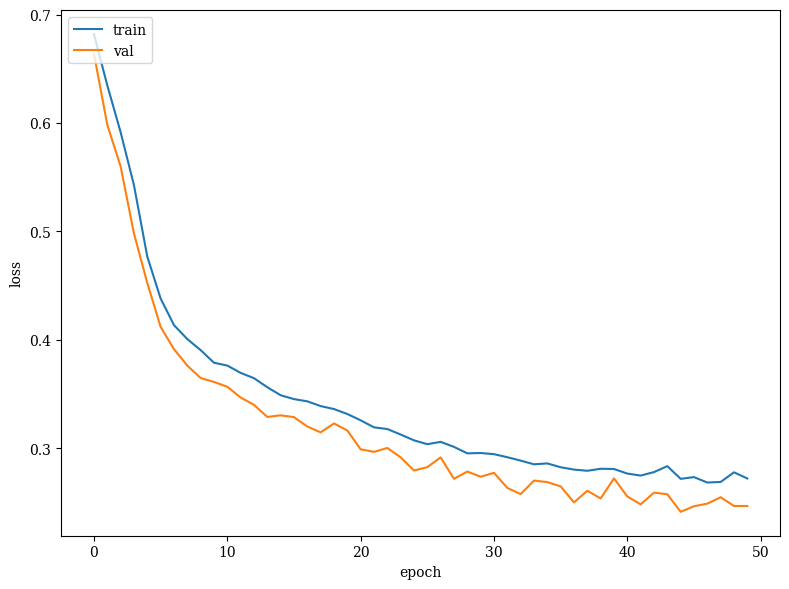

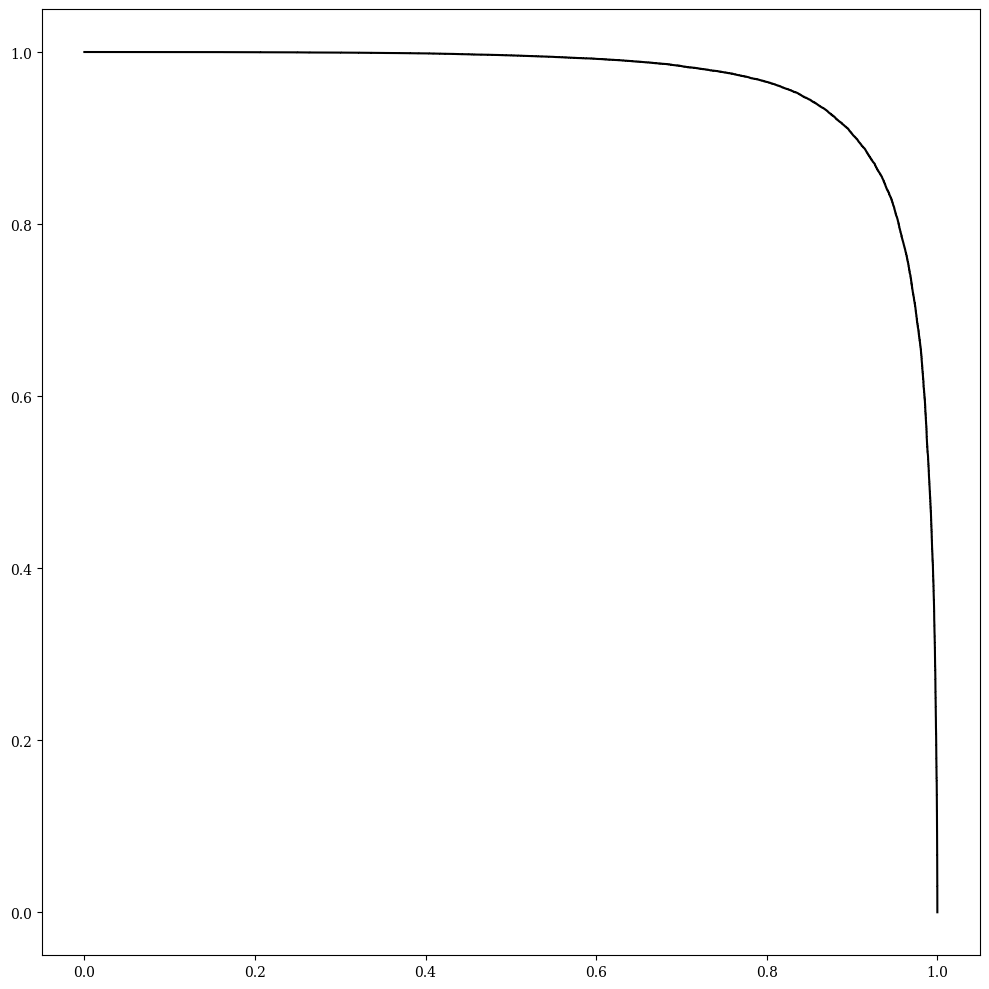

In [4]:
# Regular EFN, no spectral normalization
loss = BinaryCrossentropy(from_logits=False)
model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                "F_dropouts":0.1,
                "input_dim":2,
                "output_dim":1,"output_act":"sigmoid",
                "patience":5,
                "optimizer":Adam(1e-3),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = False
train_kwargs = {"epochs":100,"verbose":1,"batch_size":128}
efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn_name = "keras_models_v1/gjet_EFN_zpT_iter10.keras"
efn.save(efn_name)
del efn
gc.collect()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 60)     361         ['phats_input[0][0]']            
                                                                                                  
 activation_35 (Activation)     (None, None, 60)     0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 60)     7321        ['activation_35[0][0]']          
                                                                                            

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 167ms/step - loss: 0.6931 - acc: 0.5082 - val_loss: 0.6931 - val_acc: 0.5161
Epoch 2/150
20/20 [==============================] - 3s 131ms/step - loss: 0.6931 - acc: 0.5123 - val_loss: 0.6931 - val_acc: 0.5174
Epoch 3/150
20/20 [==============================] - 3s 136ms/step - loss: 0.6931 - acc: 0.5165 - val_loss: 0.6931 - val_acc: 0.5155
Epoch 4/150
20/20 [==============================] - 3s 131ms/step - loss: 0.6931 - acc: 0.5138 - val_loss: 0.6930 - val_acc: 0.5136
Epoch 5/150
20/20 [==============================] - 3s 134ms/step - loss: 0.6930 - acc: 0.5143 - val_loss: 0.6930 - val_acc: 0.5127
Epoch 6/150
20/20 [==============================] - 3s 133ms/step - loss: 0.6930 - acc: 0.5132 - val_loss: 0.6930 - val_acc: 0.5131
Epoch 7/150
20/20 [==============================] - 3s 138ms/step - loss: 0.6930 - acc: 0.5114 - val_loss: 0.6930 - val_acc: 0.5126
Epoch 8/150
20/20 [==============================] - 3s 128ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 160ms/step - loss: 0.6931 - acc: 0.5122 - val_loss: 0.6931 - val_acc: 0.5136
Epoch 2/150
20/20 [==============================] - 3s 136ms/step - loss: 0.6931 - acc: 0.5114 - val_loss: 0.6931 - val_acc: 0.5131
Epoch 3/150
20/20 [==============================] - 3s 129ms/step - loss: 0.6931 - acc: 0.5125 - val_loss: 0.6931 - val_acc: 0.5113
Epoch 4/150
20/20 [==============================] - 3s 135ms/step - loss: 0.6931 - acc: 0.5096 - val_loss: 0.6930 - val_acc: 0.5113
Epoch 5/150
20/20 [==============================] - 3s 132ms/step - loss: 0.6931 - acc: 0.5107 - val_loss: 0.6930 - val_acc: 0.5117
Epoch 6/150
20/20 [==============================] - 3s 137ms/step - loss: 0.6930 - acc: 0.5083 - val_loss: 0.6930 - val_acc: 0.5092
Epoch 7/150
20/20 [==============================] - 3s 132ms/step - loss: 0.6930 - acc: 0.5093 - val_loss: 0.6930 - val_acc: 0.5094
Epoch 8/150
20/20 [==============================] - 3s 129ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 156ms/step - loss: 0.6931 - acc: 0.5045 - val_loss: 0.6931 - val_acc: 0.5162
Epoch 2/150
20/20 [==============================] - 3s 129ms/step - loss: 0.6931 - acc: 0.5146 - val_loss: 0.6931 - val_acc: 0.5117
Epoch 3/150
20/20 [==============================] - 3s 137ms/step - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6931 - val_acc: 0.5119
Epoch 4/150
20/20 [==============================] - 3s 130ms/step - loss: 0.6931 - acc: 0.5105 - val_loss: 0.6931 - val_acc: 0.5108
Epoch 5/150
20/20 [==============================] - 3s 135ms/step - loss: 0.6931 - acc: 0.5092 - val_loss: 0.6930 - val_acc: 0.5115
Epoch 6/150
20/20 [==============================] - 3s 136ms/step - loss: 0.6930 - acc: 0.5107 - val_loss: 0.6930 - val_acc: 0.5092
Epoch 7/150
20/20 [==============================] - 3s 133ms/step - loss: 0.6930 - acc: 0.5095 - val_loss: 0.6930 - val_acc: 0.5093
Epoch 8/150
20/20 [==============================] - 3s 130ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 161ms/step - loss: 0.6931 - acc: 0.5091 - val_loss: 0.6931 - val_acc: 0.5156
Epoch 2/150
20/20 [==============================] - 3s 144ms/step - loss: 0.6931 - acc: 0.5138 - val_loss: 0.6931 - val_acc: 0.5150
Epoch 3/150
20/20 [==============================] - 3s 145ms/step - loss: 0.6931 - acc: 0.5137 - val_loss: 0.6931 - val_acc: 0.5122
Epoch 4/150
20/20 [==============================] - 3s 136ms/step - loss: 0.6931 - acc: 0.5138 - val_loss: 0.6931 - val_acc: 0.5119
Epoch 5/150
20/20 [==============================] - 3s 134ms/step - loss: 0.6931 - acc: 0.5100 - val_loss: 0.6931 - val_acc: 0.5102
Epoch 6/150
20/20 [==============================] - 3s 143ms/step - loss: 0.6931 - acc: 0.5113 - val_loss: 0.6930 - val_acc: 0.5085
Epoch 7/150
20/20 [==============================] - 3s 144ms/step - loss: 0.6930 - acc: 0.5096 - val_loss: 0.6930 - val_acc: 0.5101
Epoch 8/150
20/20 [==============================] - 3s 141ms/step - 

/home/sbrightt/.conda/envs/eflow/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/150
20/20 [==============================] - 5s 164ms/step - loss: 0.6931 - acc: 0.5116 - val_loss: 0.6931 - val_acc: 0.5132
Epoch 2/150
20/20 [==============================] - 3s 129ms/step - loss: 0.6931 - acc: 0.5112 - val_loss: 0.6931 - val_acc: 0.5119
Epoch 3/150
20/20 [==============================] - 3s 136ms/step - loss: 0.6931 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5086
Epoch 4/150
20/20 [==============================] - 3s 134ms/step - loss: 0.6931 - acc: 0.5058 - val_loss: 0.6930 - val_acc: 0.5092
Epoch 5/150
20/20 [==============================] - 3s 143ms/step - loss: 0.6930 - acc: 0.5095 - val_loss: 0.6930 - val_acc: 0.5078
Epoch 6/150
20/20 [==============================] - 3s 134ms/step - loss: 0.6930 - acc: 0.5074 - val_loss: 0.6930 - val_acc: 0.5083
Epoch 7/150
20/20 [==============================] - 3s 139ms/step - loss: 0.6930 - acc: 0.5087 - val_loss: 0.6930 - val_acc: 0.5078
Epoch 8/150
20/20 [==============================] - 3s 139ms/step - 

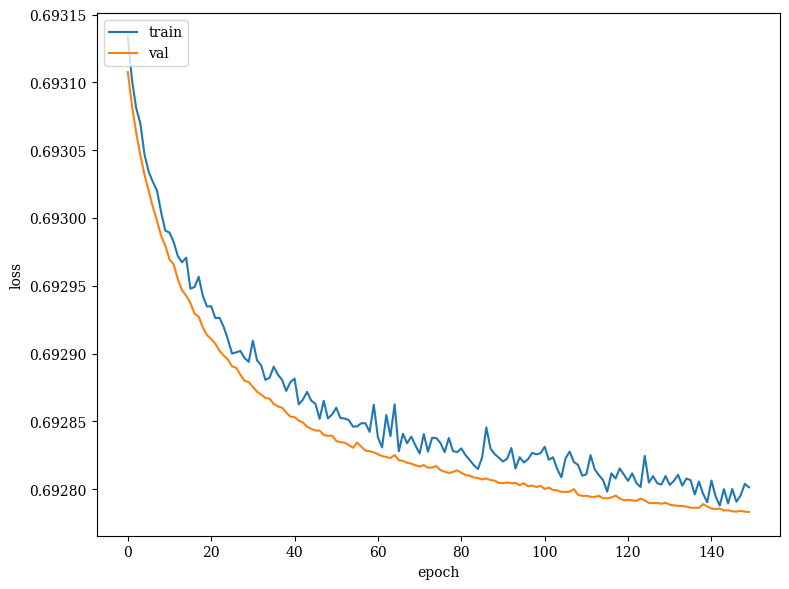

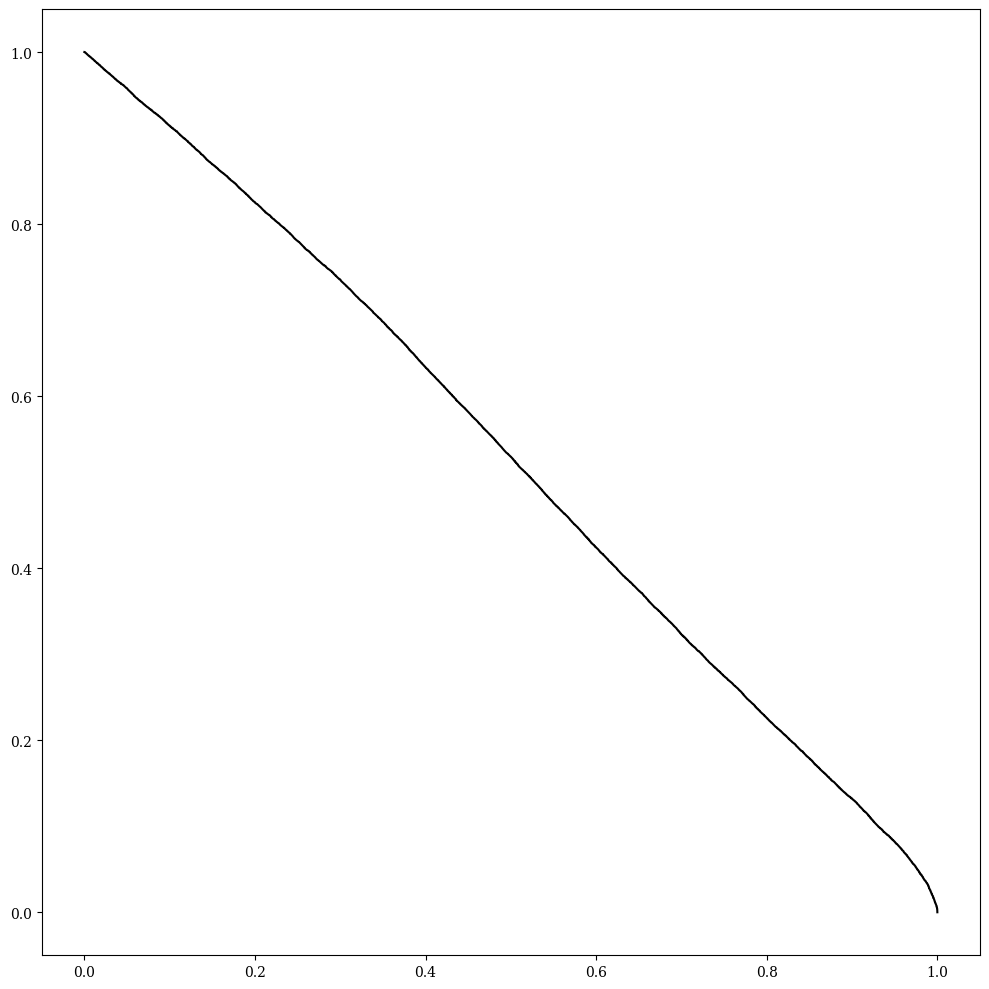

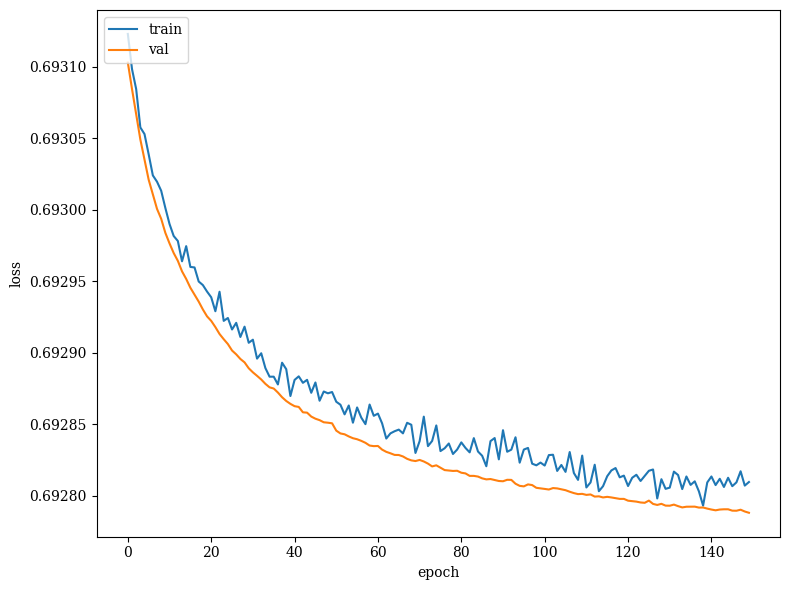

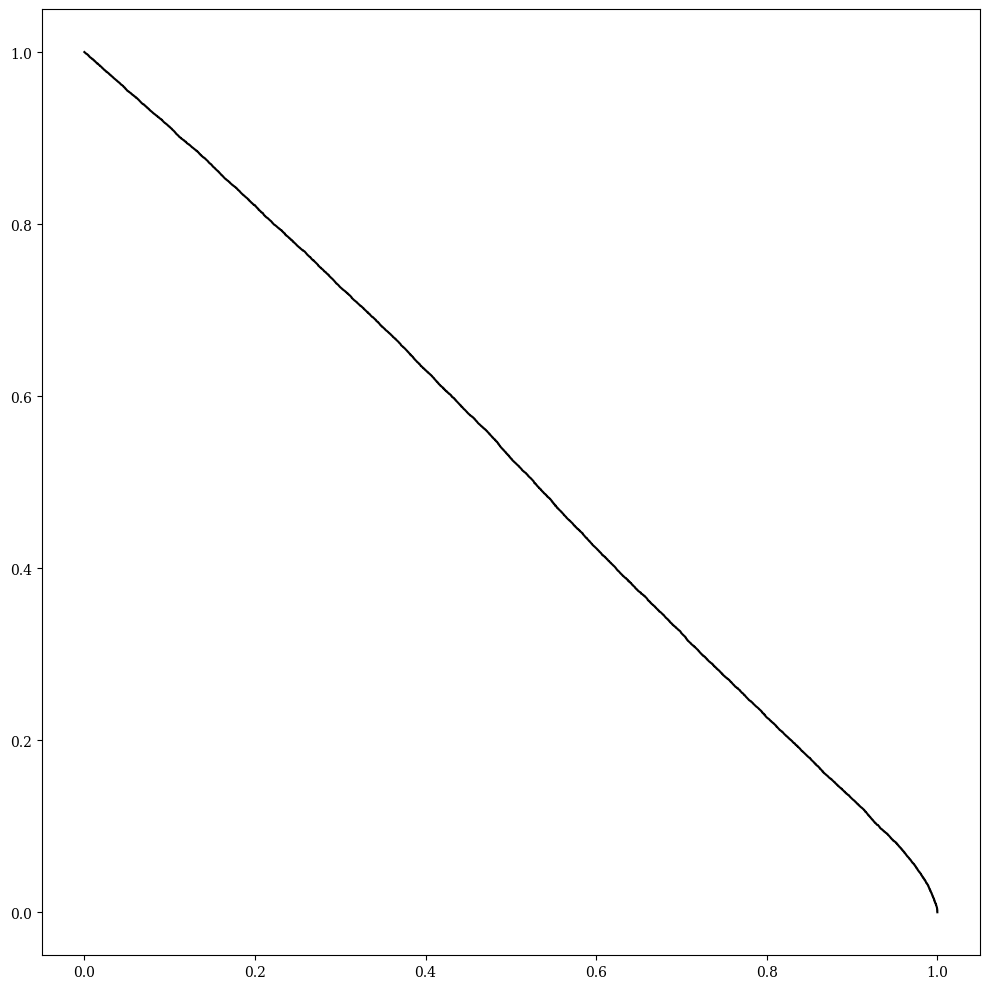

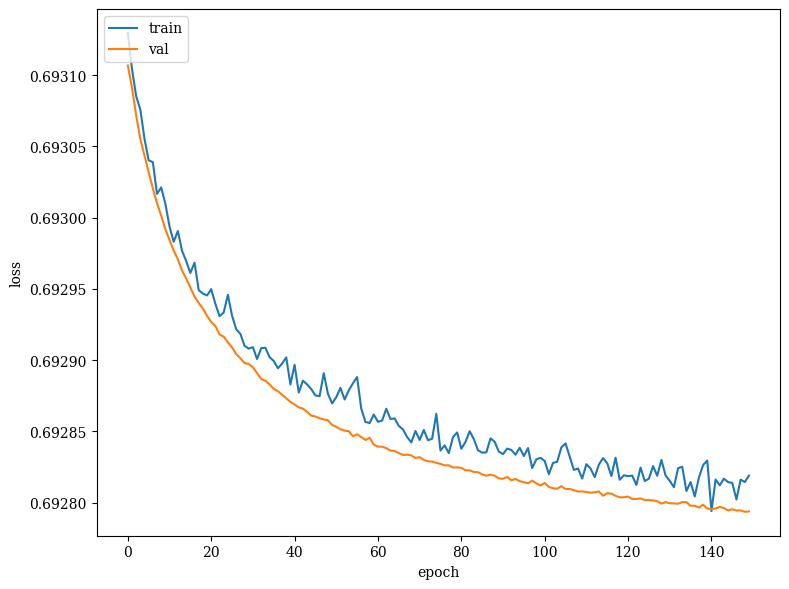

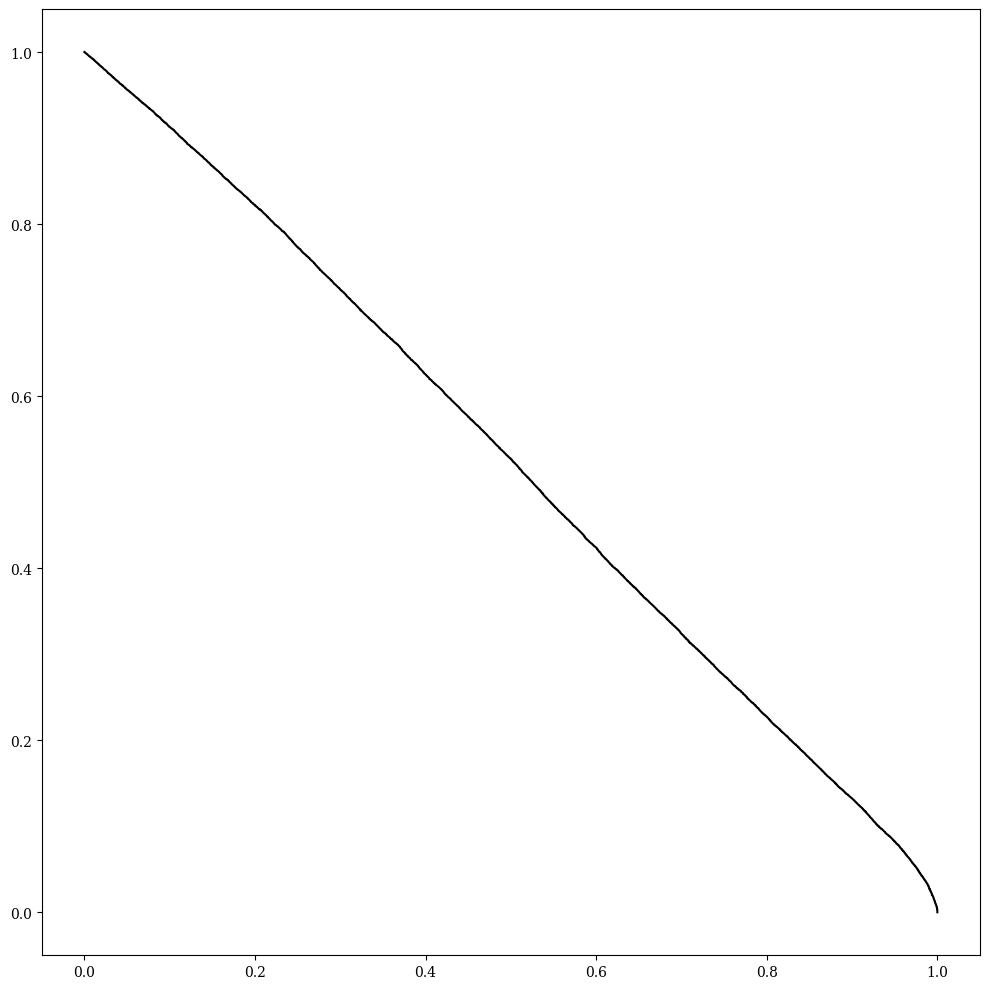

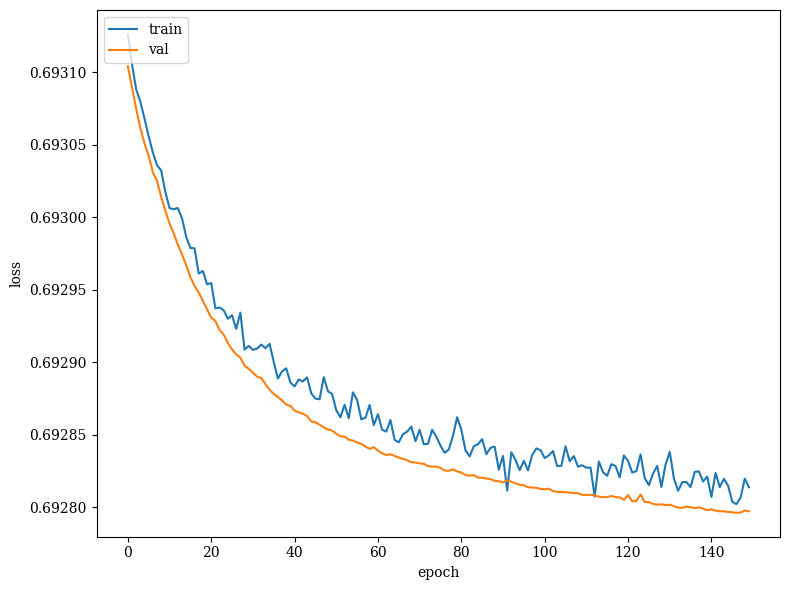

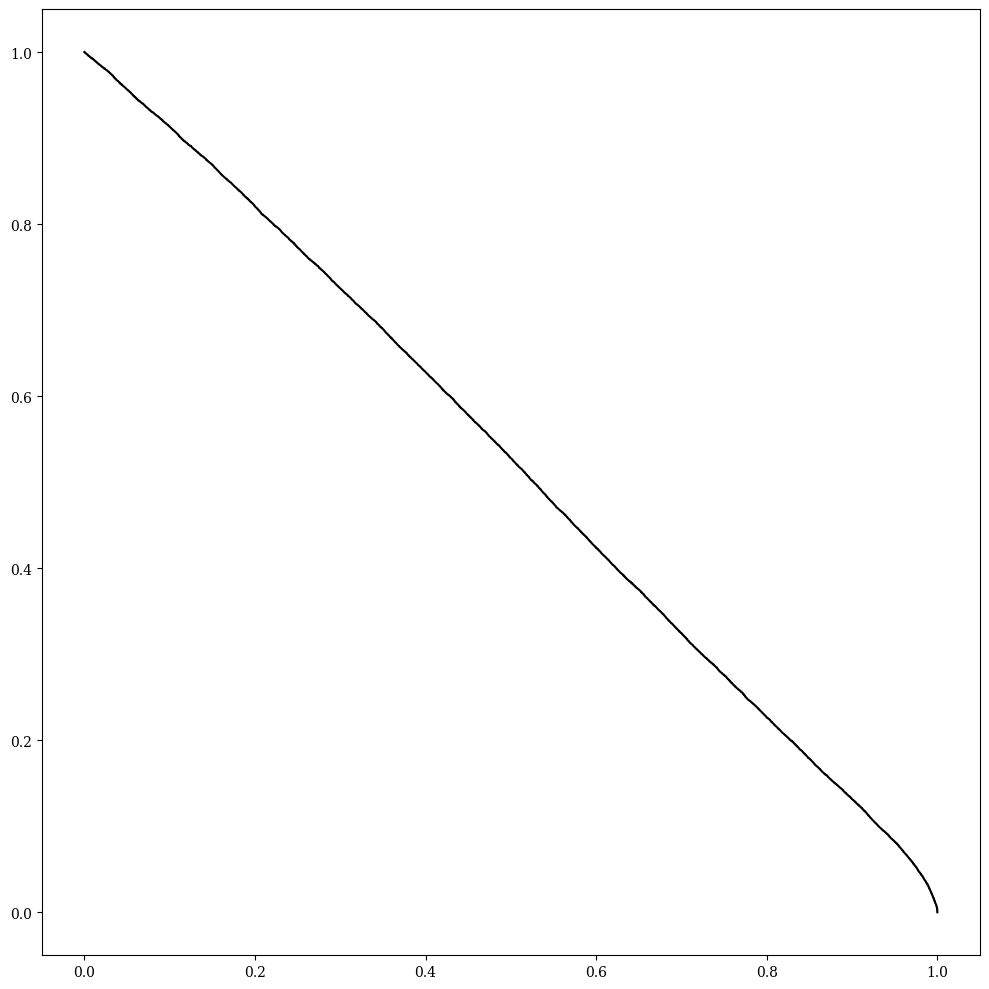

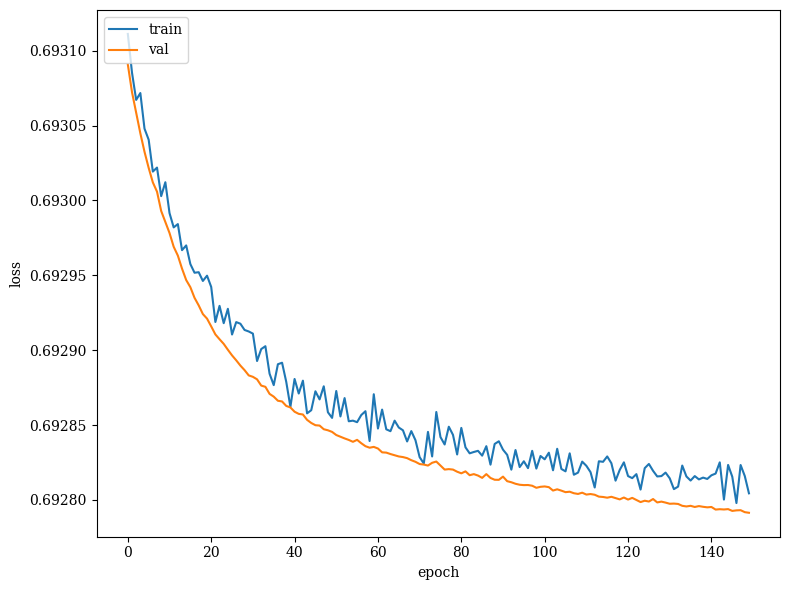

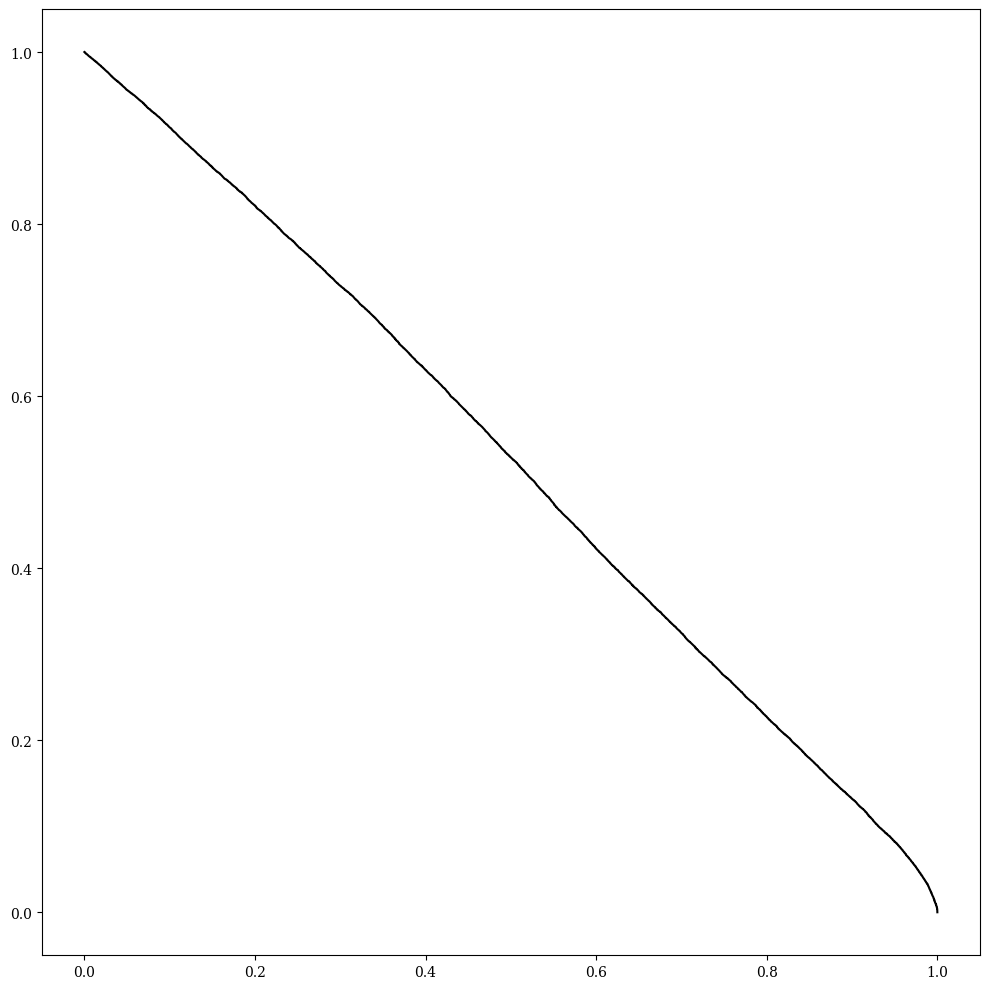

In [6]:
# EFN with spectral normalization
for i in range(6,11):
    loss = BinaryCrossentropy(from_logits=False)
    model_kwargs = {"Phi_sizes":(60,60,60), "F_sizes":(80,80,80),
                    "F_dropouts":0.1,
                    "input_dim":2,
                    "output_dim":1,"output_act":"sigmoid",
                    "patience":5,
                    "optimizer":Adam(1e-4),
                    "loss":loss,
                    "summary":True}
    model_kwargs['spectral'] = True
    train_kwargs = {"epochs":150,"verbose":1,"batch_size":10000}
    efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                                  (test,test_labels),
                                                  (val,val_labels),
                                                  model_kwargs,
                                                  train_kwargs,
                                                  plot=True)
    efn.save(f"keras_models_wta/gjet_spectralEFN_zpT_iter{i}.keras")
    del efn
    gc.collect()

## L = 2

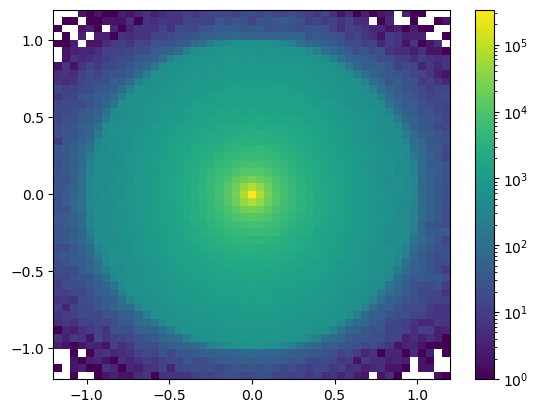

In [4]:
mask = test[test_labels[:,0]==1][:,:,0].flatten()>0
from matplotlib.colors import LogNorm
h = plt.hist2d(test[test_labels[:,0]==1][:,:,1].flatten()[mask],test[test_labels[:,0]==1][:,:,2].flatten()[mask],
               bins=np.linspace(-1.2,1.2,50),norm=LogNorm())
plt.colorbar()

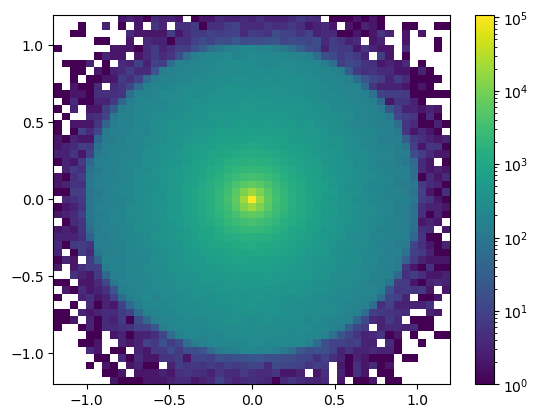

In [5]:
mask = test[test_labels[:,0]==0][:,:,0].flatten()>0
from matplotlib.colors import LogNorm
h = plt.hist2d(test[test_labels[:,0]==0][:,:,1].flatten()[mask],test[test_labels[:,0]==0][:,:,2].flatten()[mask],
               bins=np.linspace(-1.2,1.2,50),norm=LogNorm())
plt.colorbar()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 100)    300         ['phats_input[0][0]']            
                                                                                                  
 activation (Activation)        (None, None, 100)    0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 100)    10100       ['activation[0][0]']             
                                                                                              

2023-09-13 19:49:06.771563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-13 19:49:07.973056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-13 19:49:07.973456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-13 19:49:07.974545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Epoch 1/500


2023-09-13 19:49:13.363184: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


20/20 [==============================] - 6s 170ms/step - loss: 0.6933 - acc: 0.5161 - val_loss: 0.6927 - val_acc: 0.5226
Epoch 2/500
20/20 [==============================] - 3s 136ms/step - loss: 0.6924 - acc: 0.5340 - val_loss: 0.6916 - val_acc: 0.5664
Epoch 3/500
20/20 [==============================] - 3s 136ms/step - loss: 0.6910 - acc: 0.5660 - val_loss: 0.6893 - val_acc: 0.5961
Epoch 4/500
20/20 [==============================] - 3s 138ms/step - loss: 0.6880 - acc: 0.6064 - val_loss: 0.6849 - val_acc: 0.6484
Epoch 5/500
20/20 [==============================] - 3s 136ms/step - loss: 0.6828 - acc: 0.6482 - val_loss: 0.6780 - val_acc: 0.6781
Epoch 6/500
20/20 [==============================] - 3s 137ms/step - loss: 0.6753 - acc: 0.6727 - val_loss: 0.6692 - val_acc: 0.6790
Epoch 7/500
20/20 [==============================] - 3s 137ms/step - loss: 0.6663 - acc: 0.6747 - val_loss: 0.6587 - val_acc: 0.6770
Epoch 8/500
20/20 [==============================] - 3s 136ms/step - loss: 0.6555

0

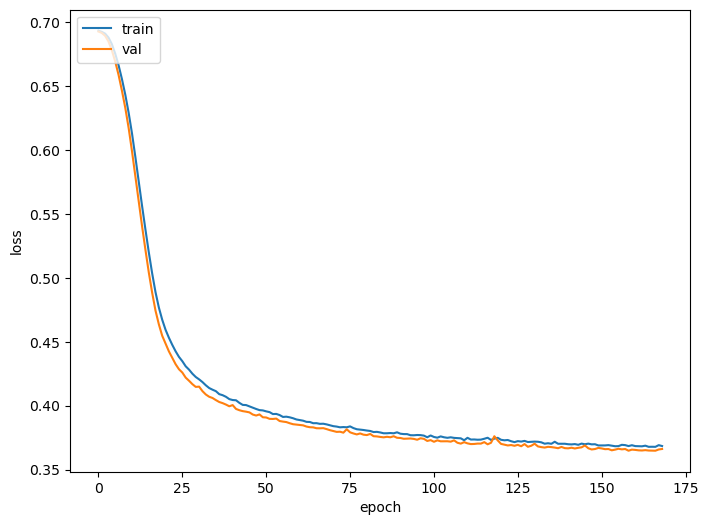

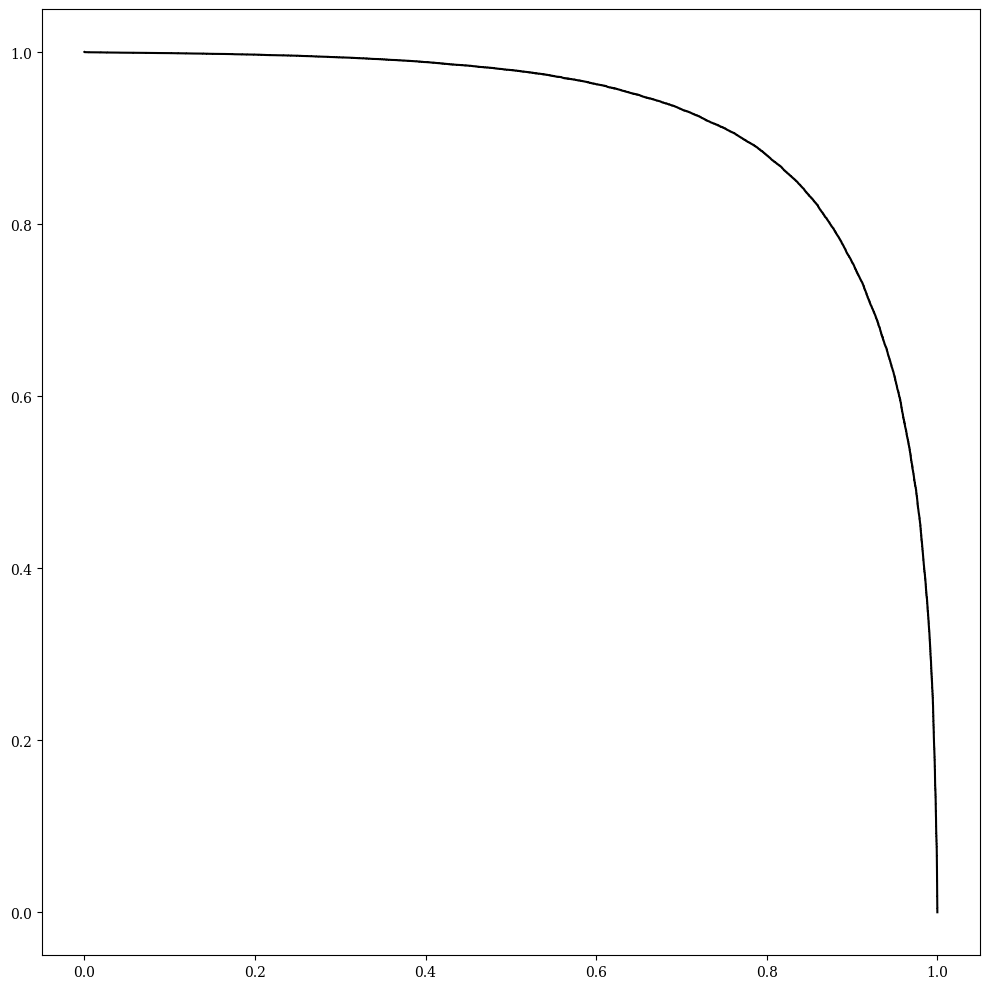

In [6]:
# Regular EFN, no spectral normalization
loss = BinaryCrossentropy(from_logits=False)
L = 2
model_kwargs = {"Phi_sizes":(100,100,L), "F_sizes":(100,100,100),
                "F_dropouts":0.1,
                "input_dim":2,
                "output_dim":1,"output_act":"sigmoid",
                "patience":10,
                "optimizer":Adam(1e-4),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = False
train_kwargs = {"epochs":500,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save(f"keras_models_wta_Lsmall/gjet_EFN_zpT_L{L}_iter1.keras")
#del efn
gc.collect()

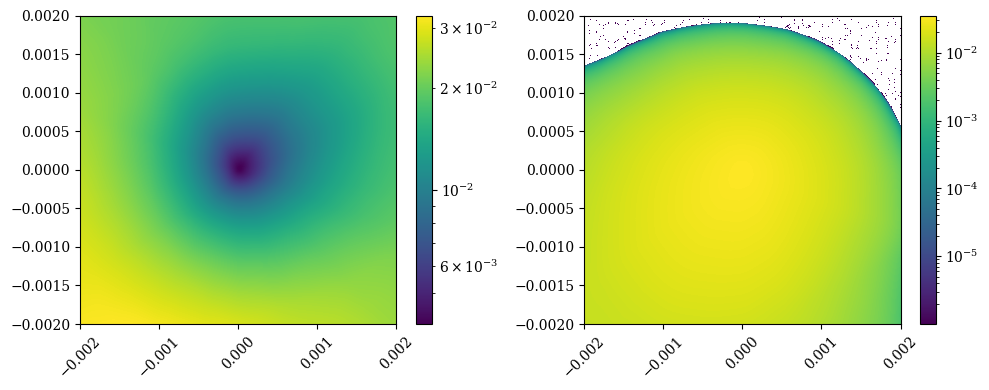

In [18]:
from matplotlib.colors import LogNorm, Normalize
R = 0.002
X,Y,Z = efn.eval_filters(R,prune=False,n=300)
colors = ["Reds","Blues","Greens","Oranges","Purples","Greys","YlOrBr","RdPu"]
fig,axes = plt.subplots(1,len(Z),figsize=(5*len(Z),4))
for i in range(len(Z)):
    plt.sca(axes.flatten()[i])
    norm = Normalize() if np.all(Z[i] == 0) else LogNorm()
    plt.imshow(Z[i].T,origin='lower',extent=[-R,R,-R,R],aspect='auto',norm=norm)
    plt.colorbar()
    plt.xticks(rotation=45)

In [11]:
import tensorflow.keras.backend as K
from tensorflow.keras import __version__ as __keras_version__

In [12]:
s = efn.Phi_sizes[-1]
in_t, out_t = efn.inputs[1], efn._tensors[efn._tensor_inds['latent'][0]-1]
# construct function
kf = K.function(in_t,out_t)
kf2 = K.function(efn._tensors[efn._tensor_inds['latent'][1]-1],efn._tensors[-1])

In [13]:
nx=100
ny=100
xmax = 0.1
xmin = 0
ymax= 0.1
ymin = 0
xs, ys = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(xs, ys, indexing='ij')
XY = np.asarray([X, Y]).reshape((2, nx*ny)).transpose(1,0)
s = 1

# evaluate function
Z = kf2(XY).reshape(nx, ny)

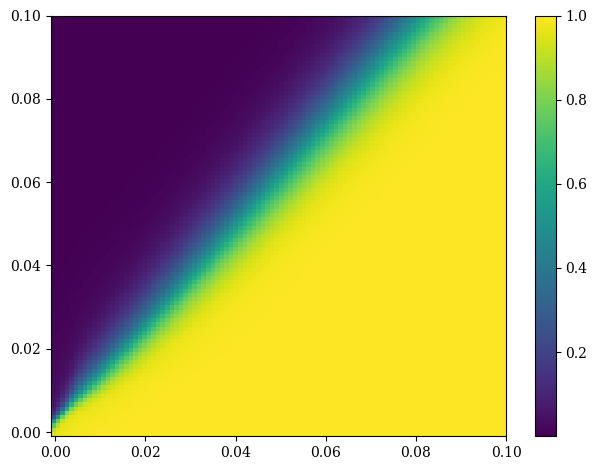

In [14]:
plt.imshow(Z.T,origin='lower',extent=[-0.001,xmax,-0.001,ymax],aspect='auto')
plt.colorbar()

In [15]:
def process(chunk):
    return np.sum(chunk[:,:,:1]*kf(chunk[:,:,1:]),axis=1)
def label(chunk):
    return kf2(chunk)
split = np.array_split(np.arange(len(test)),len(test)//1000)
latent = []
out = []
out2 = []
for sp in split:
    l = process(test[sp])
    o = label(l)
    latent.append(l)
    out.append(o)
    out2.append(efn.predict([test[sp][:,:,0],test[sp][:,:,1:]]))
latent = np.concatenate(latent,axis=0)
out = np.concatenate(out,axis=0)
out2 = np.concatenate(out2,axis=0)

32/32 [==============================] - 0s 2ms/step


## L = 1 study

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 phats_input (InputLayer)       [(None, None, 2)]    0           []                               
                                                                                                  
 tdist_0 (TimeDistributed)      (None, None, 100)    300         ['phats_input[0][0]']            
                                                                                                  
 activation_7 (Activation)      (None, None, 100)    0           ['tdist_0[0][0]']                
                                                                                                  
 tdist_1 (TimeDistributed)      (None, None, 100)    10100       ['activation_7[0][0]']           
                                                                                           

1431

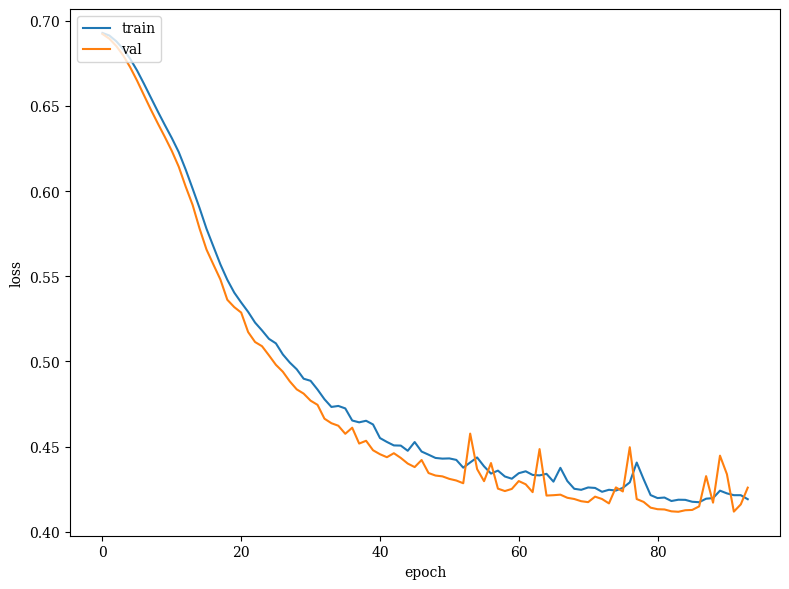

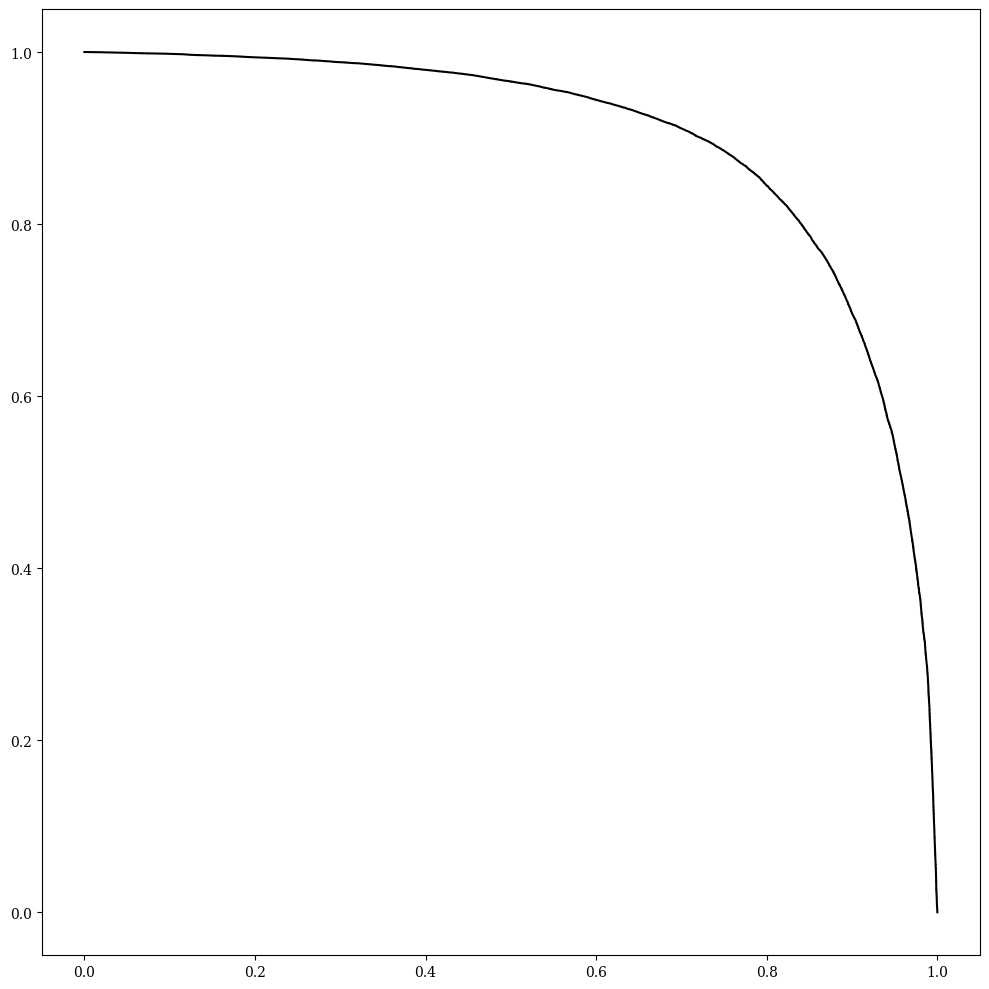

In [19]:
# Regular EFN, no spectral normalization
loss = BinaryCrossentropy(from_logits=False)
L = 1
model_kwargs = {"Phi_sizes":(100,100,L), "F_sizes":(100,100,100),
                "F_dropouts":0.1,
                "input_dim":2,
                "output_dim":1,"output_act":"sigmoid",
                "patience":10,
                "optimizer":Adam(1e-4),
                "loss":loss,
                "summary":True}
model_kwargs['spectral'] = False
train_kwargs = {"epochs":500,"verbose":1,"batch_size":10000}
efn, auc, efn_fp, efn_tp, threshs = train_efn((train,train_labels),
                                              (test,test_labels),
                                              (val,val_labels),
                                              model_kwargs,
                                              train_kwargs,
                                              plot=True)
efn.save(f"keras_models_wta_Lsmall/gjet_EFN_zpT_L{L}_iter1.keras")
#del efn
gc.collect()

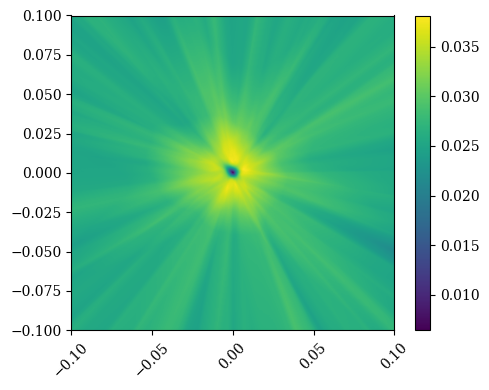

In [22]:
from matplotlib.colors import LogNorm, Normalize
from scipy.optimize import curve_fit
R = 0.1
X,Y,Z = efn.eval_filters(R,prune=False,n=1000)
colors = ["Reds","Blues","Greens","Oranges","Purples","Greys","YlOrBr","RdPu"]
fig,axes = plt.subplots(1,1,figsize=(5*len(Z),4))
for i in range(len(Z)):
    plt.sca(axes)
    norm = Normalize()
    plt.imshow(Z[i].T,origin='lower',extent=[-R,R,-R,R],aspect='auto',norm=norm)
    plt.colorbar()
    plt.xticks(rotation=45)

/tmp/ipykernel_421574/3641381354.py:2: RuntimeWarning: invalid value encountered in log
  return a - b*np.log(x+c)


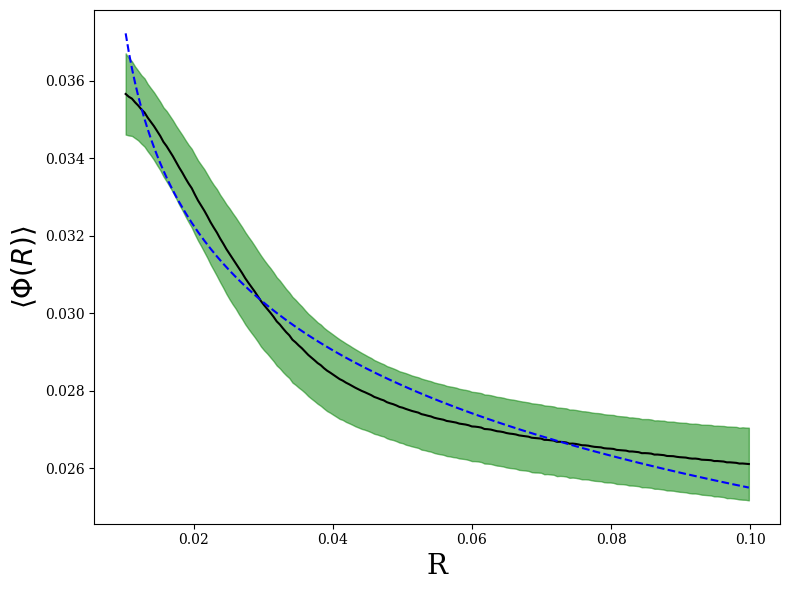

In [23]:
def log_func(x,a,b,c):
    return a - b*np.log(x+c)
R = np.sqrt(X**2 + Y**2)
rbins = np.linspace(0.01,0.1,200)
bin_centers = (rbins[:-1]+rbins[1:])/2
r_inds = np.digitize(R.flatten(),rbins)-1
z_means = np.array([np.mean(Z.flatten()[r_inds == i]) for i in range(len(bin_centers))])
z_stds = np.array([np.std(Z.flatten()[r_inds == i]) for i in range(len(bin_centers))])

remove = np.isnan(z_means) | np.isnan(z_stds)

popt, pcov = curve_fit(log_func, bin_centers[~remove], z_means[~remove], sigma=z_stds[~remove])
#popt, pcov = curve_fit(log_func, R.flatten(),Z.flatten())
plt.figure(figsize=(8,6))
plt.plot(bin_centers,z_means,zorder=2,color='black')
plt.fill_between(bin_centers,z_means+z_stds,z_means-z_stds,color='green',alpha=0.5,zorder=1)
plt.xlabel("R",fontsize=20)
plt.ylabel(r"$\langle \Phi(R) \rangle$",fontsize=20)
plt.plot(bin_centers,log_func(bin_centers,*popt),color='blue',linestyle='--')
#plt.plot(bin_centers,popt[0]*np.log(1/(0.01*bin_centers)))